<a href="https://colab.research.google.com/github/peterjay7/Python2/blob/main/%ED%85%8D%EC%8A%A4%ED%8A%B8_%EB%A7%88%EC%9D%B4%EB%8B%9D_06_%EB%89%B4%EC%8A%A4_%ED%85%8D%EC%8A%A4%ED%8A%B8_Word_Cloud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 경제 뉴스 클라우드
* feedparser, newspaper, konlpy 등 다양한 파이썬 라이브러를 활용
* 뉴스 텍스트 데이터 수집, 전처리, 형태소 분석(명사추출), 출현 회수 카운트, 클라우드로 시각화까지 진행
* (import를 제외하면) 약 20라인 정도의 코드

<img src="https://i.imgur.com/jd1VoSE.png" >

# 텍스트 마이닝 06 - 뉴스 텍스트 Word Cloud

<img width="40%" src="https://i.imgur.com/AydcsdT.png">
    
**2017-2023 [FinanceData.KR]()**

## 필요 라이브러리 설치

In [ ]:
# 폰트설치 (구글 Colab)
!apt-get install -q fonts-nanum*

# 라이브러리 설치 (구글 Colab)
!pip install feedparser
!pip install newspaper3k
!pip -q install konlpy

'apt-get'��(��) ���� �Ǵ� �ܺ� ����, ������ �� �ִ� ���α׷�, �Ǵ�
��ġ ������ �ƴմϴ�.


## 전체코드

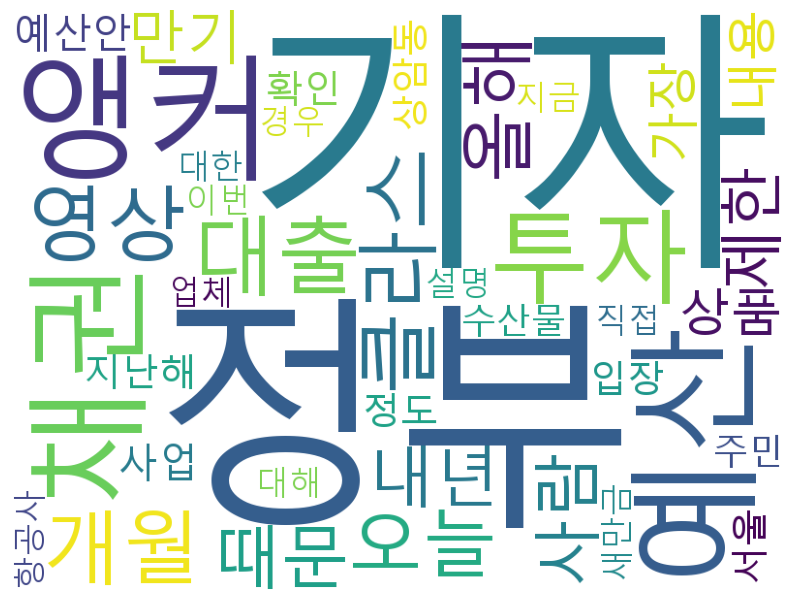

In [ ]:
import feedparser
import newspaper
from konlpy.tag import Okt
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud

def draw_wordcloud_from_rss(rss_link):
    #  feedparser, newspaper: RSS를 통해 뉴스의 본문을 수집
    feeds = feedparser.parse(rss_link)
    links = [entry['link'] for entry in feeds['entries']]

    news_text =''
    for link in links:
        article = newspaper.Article(link, language='ko')
        article.download()
        article.parse()
        news_text += article.text

    # konlpy: 형태소 분석을 통해 본문에서 명사추출, 1글자는 단어는 삭제
    engine = Okt()
    nouns = engine.nouns(news_text)
    nouns = [n for n in nouns if len(n) > 1]

    # Counter: 단어수 세기, 가장 많이 등장한 단어(명사) 40개
    count = Counter(nouns)
    tags = count.most_common(40)

    # WordCloud, matplotlib: 단어 구름 그리기
    font_path = '/usr/share/fonts/truetype/nanum/NanumMyeongjoBold.ttf'
    font_path = 'c:/Windows/Fonts/malgun.ttf'
    wc = WordCloud(font_path=font_path, background_color='white', width=800, height=600)
    cloud = wc.generate_from_frequencies(dict(tags))
    plt.figure(figsize=(10,8))
    plt.axis('off')
    plt.imshow(cloud)

# JTBC 뉴스 (경제) RSS
rss_link = 'https://fs.jtbc.co.kr/RSS/economy.xml'
draw_wordcloud_from_rss(rss_link)

## 한글 폰트 설치

```bash
# 나눔폰트 - nanum
$ sudo apt-get install fonts-nanum fonts-nanum-coding fonts-nanum-extra
... 중략 ...

$ ls /usr/share/fonts/truetype/nanum/
NanumBarunGothic.ttf NanumBrush.ttf NanumGothicBold.ttf NanumGothicLight.ttf NanumGothic_Coding_Bold.ttf NanumMyeongjoBold.ttf NanumPen.ttf  NanumBarunGothicBold.ttf NanumGothic.ttf NanumGothicExtraBold.ttf NanumGothic_Coding.ttf NanumMyeongjo.ttf NanumMyeongjoExtraBold.ttf

# (선택적) 은폰트 - unfonts
$ sudo apt-get install fonts-unfonts-core fonts-unfonts-extra

# (선택적) 백묵폰트 - baekmuk
$ sudo apt-get install fonts-baekmuk
```

## 상세 살펴보기

### 1) feedparser: 뉴스 링크 수집
* feedparser: RSS feed 파싱 라이브러리
* JTBC 경제뉴스 RSS를 통해 경제 뉴스 링크 수집(30개)

In [ ]:
import feedparser

# JTBC 경제뉴스 RSS
feeds = feedparser.parse('https://fs.jtbc.co.kr/RSS/economy.xml')
links = [entry['link'] for entry in feeds['entries']]
links

['https://news.jtbc.co.kr/article/article.aspx?news_id=NB12142263',
 'https://news.jtbc.co.kr/article/article.aspx?news_id=NB12142264',
 'https://news.jtbc.co.kr/article/article.aspx?news_id=NB12142268',
 'https://news.jtbc.co.kr/article/article.aspx?news_id=NB12142209',
 'https://news.jtbc.co.kr/article/article.aspx?news_id=NB12142210',
 'https://news.jtbc.co.kr/article/article.aspx?news_id=NB12142220',
 'https://news.jtbc.co.kr/article/article.aspx?news_id=NB12142219',
 'https://news.jtbc.co.kr/article/article.aspx?news_id=NB12142088',
 'https://news.jtbc.co.kr/article/article.aspx?news_id=NB12142037',
 'https://news.jtbc.co.kr/article/article.aspx?news_id=NB12142039',
 'https://news.jtbc.co.kr/article/article.aspx?news_id=NB12142044',
 'https://news.jtbc.co.kr/article/article.aspx?news_id=NB12141994',
 'https://news.jtbc.co.kr/article/article.aspx?news_id=NB12141928',
 'https://news.jtbc.co.kr/article/article.aspx?news_id=NB12141886',
 'https://news.jtbc.co.kr/article/article.aspx?n

### 2) newspaper: 뉴스 본분 수집
* newspaper: HTML문서에서 제목, 본문 등을 자동 식별하여 텍스트를 추출하는 라이브러리
* 본문(article.text)를 모두 news_text에 누적하여 저장

In [ ]:
import newspaper

news_text =''
for link in links:
    article = newspaper.Article(link, language='ko')
    article.download()
    article.parse()
    news_text += article.text

news_text[:1000]

"[앵커]금요일 머니클라스의 남자, '머클남', 이주찬 기자 오늘도 기대가 되는데요, 어디에 발품을 팔고 다니셨나요,[기자]이번 주는 주로 여의도 금융가를 누비고 다녔습니다. 올 여름 처음 정장도 꺼내 입어봤는데요 어제까지만 해도 덥더라고요, 올해만 개인 투자금이 25조가 몰린 곳이 있습니다. 지난해 같은기간의 두 배가 넘는 금액인데요. 바로 채권시장 입니다! 일단 준비해온 영상 함께 보시죠.시청자의 요청사항이 회사 메일로 왔습니다.50대 주부님이라고 소개한 시청자의 사연인데요, 채권투자는 어떻게 하는건지, 소액으로도 할 수 있는지 대신 좀 알아봐 줄 수 없냐고 부탁한다고 하셨는데요, 제가 알아보겠습니다.퇴근길에 도서관에 들렀습니다. 채권에 대해 공부하기 위해 큰 마음 먹고 두꺼운 책을 몇 권 빌렸습니다.열심히 공부를 해 봤지만, 도통 무슨 말인지. 솔직히 이해하기 힘들었습니다.밀려오는 허기와, 참을 수 없는 졸음.그래서 전문가를 만나 보기로 했습니다.주식 투자는 높은 수익률을 기대할 수 있지만 원금 손실의 위험 부담이 있고, 예금은 안전한 반면, 상대적으로 금리가 낮습니다.[김형호/한국채권투자운용 대표 : 예금은 이자를 연 3.5%정도 받습니다. 주식은 수익률 연 10%정도 기대할 수 있는데, 채권은 연 5~6%정도 기대할 수 있고요. 그럼 채권이 위험 하냐 부도 안 날 안전한 종목에 투자하시면 예금보다 수익이 높으니까 매력 있죠.]특히 채권은 약속한 만기 날짜까지 팔지 않고 가지고 있으면, 수익금과 원금이 모두 보장되는 것이 장점입니다.이제 채권은 어떻게 살 수 있는지 알아보겠습니다.[신수경/신한투자증권 차장 : (채권을 구입하는 방법을 알고 싶은데 어떻게 살 수 있을까요?) 채권은 증권사에서 거래하실 수 있고요, 요즘에는 스마트폰으로 채권을 손쉽게 투자하실 수 있어서 알려드리겠습니다.]스마트폰에 증권사 앱을 설치한 뒤 채권항목으르 들어가면, 처음 이용하는 고객을 위해 채권 상품에 대한 설명도 자세하게 나와있습니다.투자 종목은 회사에서 발행한 채권에서부터 

In [ ]:
len(news_text)

17457

### 3) KoNLpy + Okt: 형태소 분석
* 형태소 분석기로 명사만 추출
* 1글자는 의미가 없다고 보고 삭제

In [ ]:
from konlpy.tag import Okt

engine = Okt()
nouns = engine.nouns(news_text)

In [ ]:
len(nouns)

3175

In [ ]:
nouns = [n for n in nouns if len(n) > 1]
len(nouns)

2624

### 4) Counter: 단어 개수를 세기
* 단어의 개수를 세고,
* 가장 많이 등장한 N개 구하기 (Counter.most_common())

In [ ]:
from collections import Counter

count = Counter(nouns)
tags = count.most_common(40)
tags[:20]

[('기자', 41),
 ('정부', 33),
 ('앵커', 29),
 ('예산', 29),
 ('채권', 25),
 ('투자', 24),
 ('대출', 17),
 ('클라스', 16),
 ('영상', 16),
 ('개월', 15),
 ('오늘', 13),
 ('올해', 13),
 ('때문', 13),
 ('사람', 13),
 ('내년', 13),
 ('제한', 12),
 ('만기', 11),
 ('상품', 11),
 ('내용', 11),
 ('가장', 11)]

### 5) WordCloud, matplotlib: 단어 구름 그리기
* WordCloud 로 워드 클라이우드 이미지 생성

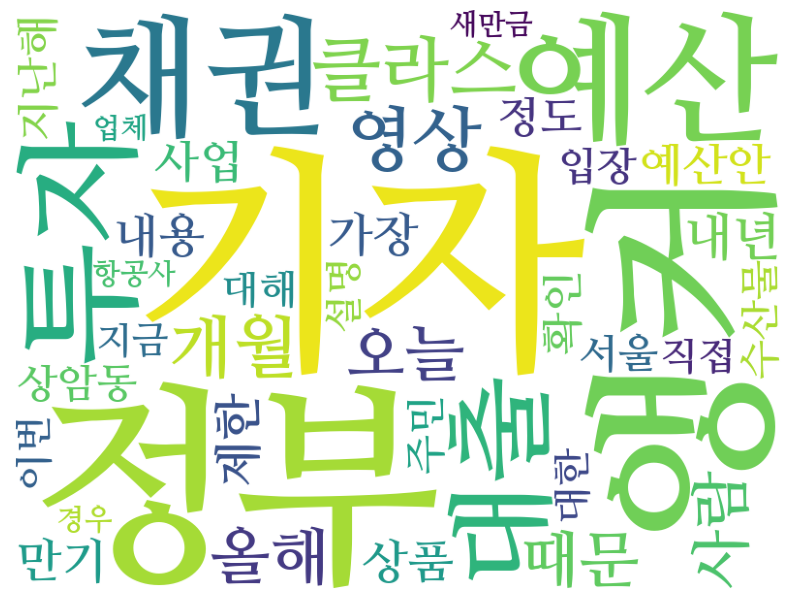

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud

font_path = '/usr/share/fonts/truetype/nanum/NanumMyeongjoBold.ttf'
font_path = 'c:/Windows/Fonts/malgun.ttf'

wc = WordCloud(font_path=font_path, background_color='white', width=800, height=600)
cloud = wc.generate_from_frequencies(dict(tags))
plt.figure(figsize=(10,8))
plt.axis('off')
plt.imshow(cloud)

## 분야별 RSS 워드 클라우드

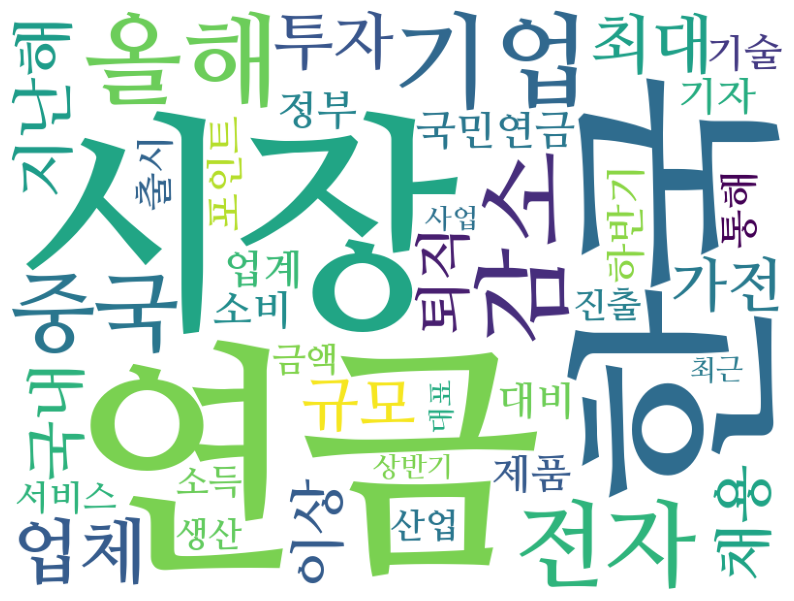

In [ ]:
# 한국경제신문 경제
draw_wordcloud_from_rss('https://www.hankyung.com/feed/economy')

In [ ]:
# 헤럴드 경제 기업
draw_wordcloud_from_rss('http://biz.heraldm.com/rss/010300000000.xml')

## Summary
* 경제 뉴스 클라우드
* 한글 폰트 설치
*상세 살펴보기
    * 1) feedparser: 뉴스 링크 수집
    * 2) newspaper: 뉴스 본분 수집
    * 3) KoNLpy + Mecab: 형태소 분석
    * 4) Counter: 단어 개수를 세기, TOP N 구하기 Counter.most_common()
    * 5) WordCloud, matplotlib: 단어 구름 그리기


**2017-2023 [FinanceData.KR]()**